In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans 

In [2]:

from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.cluster import DBSCAN
import hdbscan
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets


In [3]:
from sklearn.decomposition import PCA
from sklearn import datasets
import umap.umap_ as UMAP 
from sklearn.manifold import TSNE
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r"Shoppers_Behaviour_and_Revenue.csv")

In [5]:
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [6]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [7]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

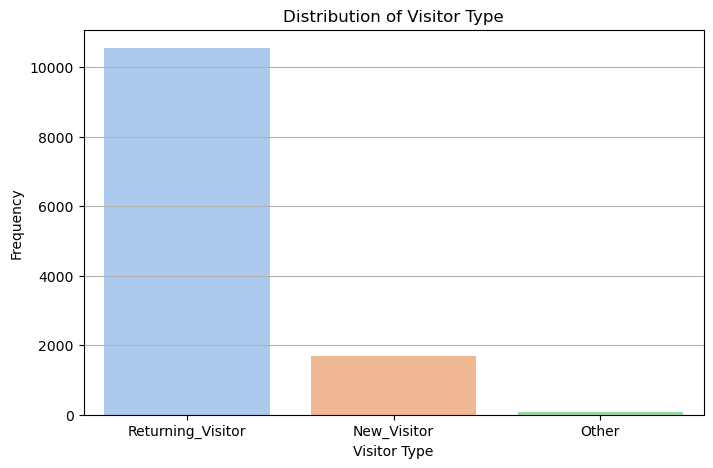

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='VisitorType', palette='pastel')
plt.title('Distribution of Visitor Type')
plt.xlabel('Visitor Type')
plt.ylabel('Frequency')
plt.grid(True, axis='y')
plt.show()


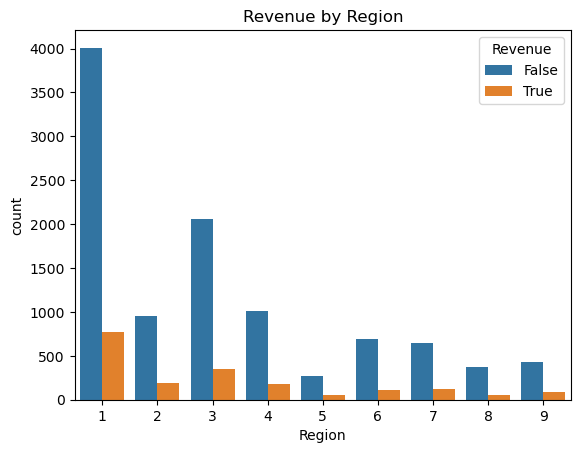

In [9]:
sns.countplot(x='Region', hue='Revenue', data=df)
plt.title('Revenue by Region')
plt.show()

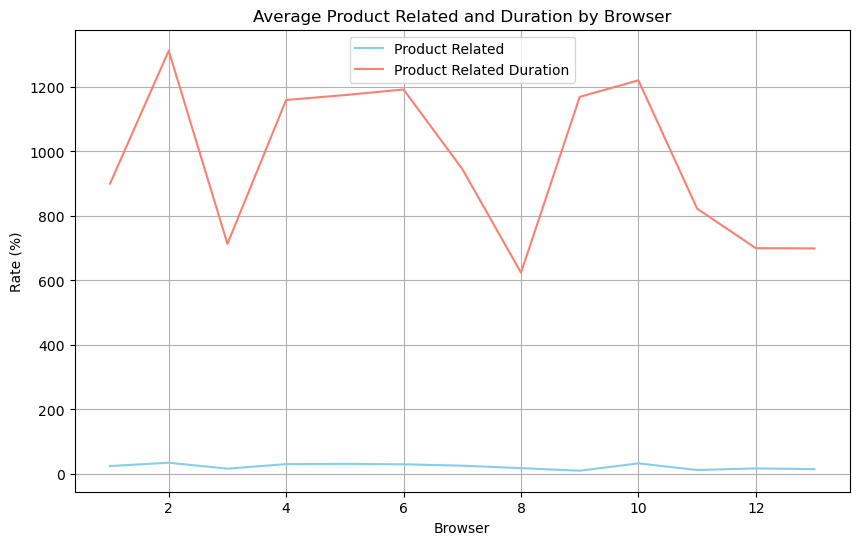

In [10]:
# Group by 'Browser' and calculate mean values
browser_group = df.groupby('Browser')[['ProductRelated', 'ProductRelated_Duration']].mean().reset_index()

# Plot clean lines
plt.figure(figsize=(10, 6))
plt.plot(browser_group['Browser'], browser_group['ProductRelated'], label='Product Related', color='skyblue')
plt.plot(browser_group['Browser'], browser_group['ProductRelated_Duration'], label='Product Related Duration', color='salmon')

plt.title('Average Product Related and Duration by Browser')
plt.xlabel('Browser')
plt.ylabel('Rate (%)')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
df_clean = df.drop(columns=['Month'])

In [12]:
cat_cols = ['OperatingSystems','Browser','Region','TrafficType','VisitorType']

for col in cat_cols:
    df_clean[col] = df_clean[col].astype('category')

In [13]:
df_encoded = pd.get_dummies(df_clean, columns=cat_cols, drop_first=True)

In [14]:
df_encoded.dtypes

Administrative                     int64
Administrative_Duration          float64
Informational                      int64
Informational_Duration           float64
ProductRelated                     int64
ProductRelated_Duration          float64
BounceRates                      float64
ExitRates                        float64
PageValues                       float64
SpecialDay                       float64
Weekend                             bool
Revenue                             bool
OperatingSystems_2                  bool
OperatingSystems_3                  bool
OperatingSystems_4                  bool
OperatingSystems_5                  bool
OperatingSystems_6                  bool
OperatingSystems_7                  bool
OperatingSystems_8                  bool
Browser_2                           bool
Browser_3                           bool
Browser_4                           bool
Browser_5                           bool
Browser_6                           bool
Browser_7       

In [15]:
print(f"Original shape: {df_clean.shape}")
print(f"Encoded shape: {df_encoded.shape}")

Original shape: (12330, 17)
Encoded shape: (12330, 60)


In [16]:
print([col for col in df_encoded.columns if 'TrafficType' in col])

['TrafficType_2', 'TrafficType_3', 'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 'TrafficType_8', 'TrafficType_9', 'TrafficType_10', 'TrafficType_11', 'TrafficType_12', 'TrafficType_13', 'TrafficType_14', 'TrafficType_15', 'TrafficType_16', 'TrafficType_17', 'TrafficType_18', 'TrafficType_19', 'TrafficType_20']


In [17]:
# Next step : Scale All feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

In [18]:
from sklearn.metrics import silhouette_score

# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
df_encoded['cluster'] = cluster_labels

# Evaluate using Silhoutte Score
score = silhouette_score(X_scaled, cluster_labels)
print(f'Silhouette Score: {score:.3f}')

Silhouette Score: 0.056


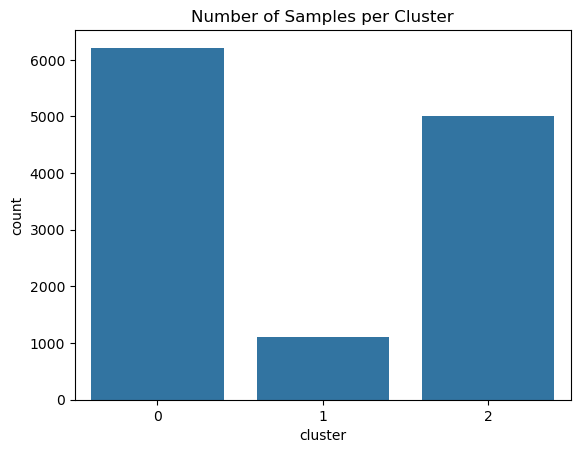

In [19]:
# check cluster dist
sns.countplot(x='cluster', data=df_encoded)
plt.title('Number of Samples per Cluster')
plt.show()

In [20]:
# Silhouette Score: 0.056(low); try diff n_clusters
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f'k = {k}, Silhouette Score = {score:.3f}')


k = 2, Silhouette Score = 0.078
k = 3, Silhouette Score = 0.056
k = 4, Silhouette Score = 0.091
k = 5, Silhouette Score = 0.076
k = 6, Silhouette Score = 0.078
k = 7, Silhouette Score = 0.081
k = 8, Silhouette Score = 0.038
k = 9, Silhouette Score = 0.038


In [21]:
# REDUCE DIMENSIONALITY
pca = PCA(n_components=10, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print(f"Total variance explained: {pca.explained_variance_ratio_.sum():2f}")

Total variance explained: 0.323265


In [22]:
kmeans = KMeans(n_clusters=4, random_state=42)
labels_pca = kmeans.fit_predict(X_pca)

score = silhouette_score(X_pca, labels_pca)
print(f'Silhouette Score after PCA: {score:.3f}')

Silhouette Score after PCA: 0.241


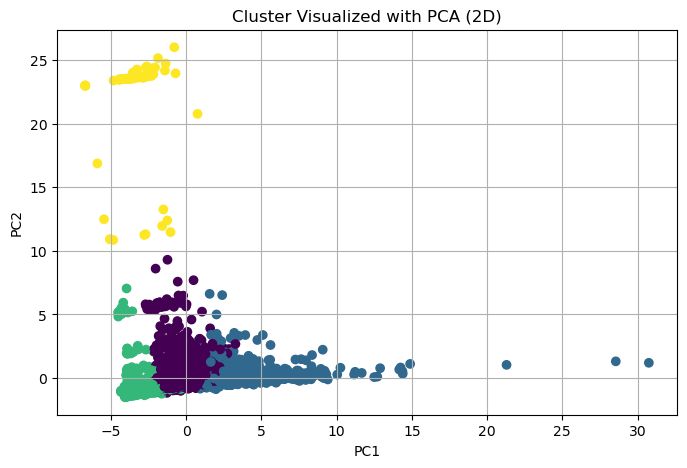

In [23]:
# Visualize the Clusters in 2D
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(8,5))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=labels_pca, cmap='viridis')
plt.title('Cluster Visualized with PCA (2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()


In [24]:
# CHECK CLUSTER PROFILES
df_encoded['cluster'] = labels_pca
cluster_summary = df_encoded.groupby('cluster').mean()
display(cluster_summary)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_Other,VisitorType_Returning_Visitor
cluster,,,,,,,,,,,,,,,,,,,,,
0,1.763251,52.272533,0.221393,8.339926,23.915858,870.259402,0.008155,0.031029,5.769267,0.060659,...,0.040951,0.000747,0.001493,0.00032,0.000107,0.000960,0.001386,0.011624,0.002240,0.829263
1,7.157638,301.991295,2.483871,210.322620,97.496044,3881.813679,0.006323,0.019343,10.273427,0.029093,...,0.056604,0.003043,0.001217,0.00000,0.000000,0.000000,0.001217,0.009130,0.000609,0.948874
2,0.113873,4.491192,0.030473,0.796592,4.704090,120.232278,0.147930,0.164334,0.027692,0.112911,...,0.209302,0.000802,0.017642,0.00000,0.000000,0.000802,0.001604,0.011227,0.007217,0.968725
3,1.746032,72.408069,0.222222,4.567725,14.888889,683.316733,0.036456,0.054350,25.434336,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.952381,0.857143,0.126984


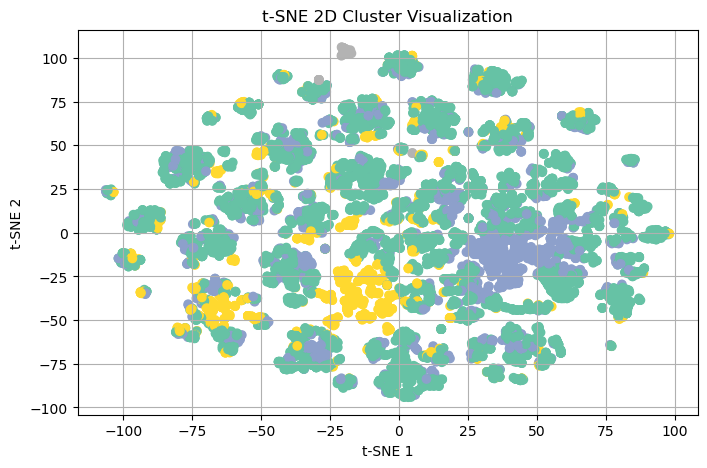

In [25]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_pca, cmap='Set2')
plt.title('t-SNE 2D Cluster Visualization')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.grid(True)
plt.show()

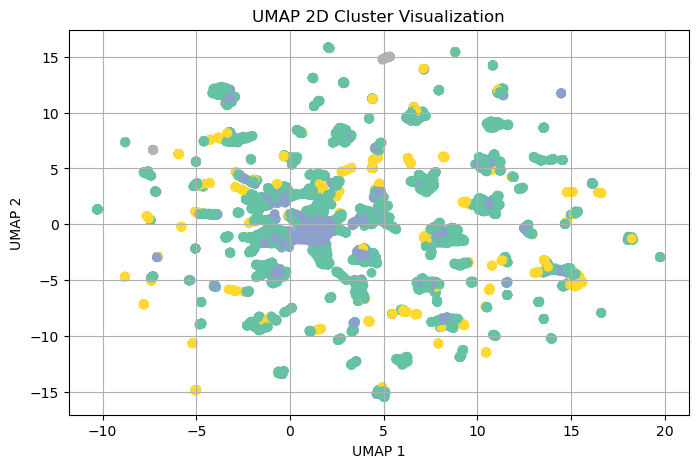

In [26]:
import umap.umap_ as umap

umap_2d = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_2d.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels_pca, cmap='Set2')
plt.title('UMAP 2D Cluster Visualization')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()


In [27]:
# PCA clustering
pca10 = PCA(n_components=10, random_state=42)
X_pca10 = pca10.fit_transform(X_scaled)
score_pca = silhouette_score(X_pca10, KMeans(n_clusters=4, random_state=42).fit_predict(X_pca10))

# t-SNE clustering
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_scaled)
score_tsne = silhouette_score(X_tsne, KMeans(n_clusters=4, random_state=42).fit_predict(X_tsne))

# UMAP clustering
X_umap = umap.UMAP(n_components=2, random_state=42).fit_transform(X_scaled)
score_umap = silhouette_score(X_umap, KMeans(n_clusters=4, random_state=42).fit_predict(X_umap))

# Print results
print(f"Silhouette Score (PCA 10D):  {score_pca:.3f}")
print(f"Silhouette Score (t-SNE 2D): {score_tsne:.3f}")
print(f"Silhouette Score (UMAP 2D):  {score_umap:.3f}")

Silhouette Score (PCA 10D):  0.241
Silhouette Score (t-SNE 2D): 0.373
Silhouette Score (UMAP 2D):  0.355


In [28]:
# TRY DBSCAN
X_embed = X_umap  # or X_tsne

# Run DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_embed)

# Check number of clusters found (excluding noise)
n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
print(f"DBSCAN found {n_clusters} clusters")

# Evaluate clustering (exclude noise points for Silhouette)
mask = labels_dbscan != -1
score_dbscan = silhouette_score(X_embed[mask], labels_dbscan[mask])
print(f"Silhouette Score (DBSCAN): {score_dbscan:.3f}")

DBSCAN found 109 clusters
Silhouette Score (DBSCAN): 0.551


In [29]:
import hdbscan

# Use same UMAP/t-SNE/PCA data
clusterer = hdbscan.HDBSCAN(min_cluster_size=10)
labels_hdbscan = clusterer.fit_predict(X_embed)

# Check number of clusters
n_clusters_h = len(set(labels_hdbscan)) - (1 if -1 in labels_hdbscan else 0)
print(f"HDBSCAN found {n_clusters_h} clusters")

# Evaluate (exclude noise)
mask_h = labels_hdbscan != -1
score_hdbscan = silhouette_score(X_embed[mask_h], labels_hdbscan[mask_h])
print(f"Silhouette Score (HDBSCAN): {score_hdbscan:.3f}")


HDBSCAN found 308 clusters
Silhouette Score (HDBSCAN): 0.754


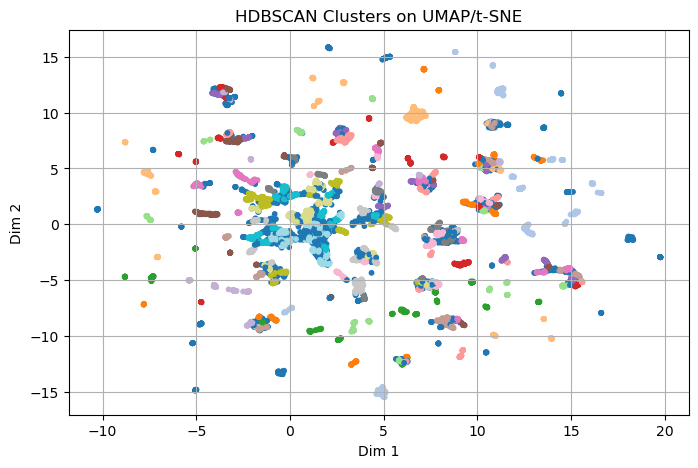

In [30]:
plt.figure(figsize=(8, 5))
plt.scatter(X_embed[:, 0], X_embed[:, 1], c=labels_hdbscan, cmap='tab20', s=10)
plt.title('HDBSCAN Clusters on UMAP/t-SNE')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.grid(True)
plt.show()

In [31]:
# Check cluster size distribution 
pd.Series(labels_hdbscan).value_counts().sort_index()

-1      1383
 0        38
 1        21
 2       102
 3       120
        ... 
 303      39
 304      87
 305     114
 306      22
 307      35
Name: count, Length: 309, dtype: int64

In [32]:
# pick top cluster by size
df_encoded['hdbscan_cluster'] = labels_hdbscan
top_clusters = df_encoded['hdbscan_cluster'].value_counts().nlargest(5).index

for cluster in top_clusters:
    print(f"\n--- Cluster {cluster} ---")
    display(df_encoded[df_encoded['hdbscan_cluster'] == cluster].mean())


--- Cluster -1 ---


Administrative                     3.610268
Administrative_Duration          124.314000
Informational                      1.240058
Informational_Duration            92.055495
ProductRelated                    47.932032
                                    ...    
TrafficType_20                     0.012292
VisitorType_Other                  0.007231
VisitorType_Returning_Visitor      0.857556
cluster                            0.612437
hdbscan_cluster                   -1.000000
Length: 62, dtype: float64


--- Cluster 50 ---


Administrative                    2.400794
Administrative_Duration          92.224514
Informational                     0.408730
Informational_Duration           21.185198
ProductRelated                   30.484127
                                   ...    
TrafficType_20                    0.000000
VisitorType_Other                 0.000000
VisitorType_Returning_Visitor     0.841270
cluster                           0.337302
hdbscan_cluster                  50.000000
Length: 62, dtype: float64


--- Cluster 121 ---


Administrative                     3.035874
Administrative_Duration          121.062309
Informational                      0.470852
Informational_Duration            24.244021
ProductRelated                    24.959641
                                    ...    
TrafficType_20                     0.000000
VisitorType_Other                  0.000000
VisitorType_Returning_Visitor      0.493274
cluster                            0.197309
hdbscan_cluster                  121.000000
Length: 62, dtype: float64


--- Cluster 230 ---


Administrative                     1.811224
Administrative_Duration           43.891970
Informational                      0.336735
Informational_Duration            11.176667
ProductRelated                    31.494898
                                    ...    
TrafficType_20                     0.000000
VisitorType_Other                  0.000000
VisitorType_Returning_Visitor      1.000000
cluster                            0.045918
hdbscan_cluster                  230.000000
Length: 62, dtype: float64


--- Cluster 179 ---


Administrative                     2.593583
Administrative_Duration           88.034248
Informational                      0.470588
Informational_Duration            32.518093
ProductRelated                    38.347594
                                    ...    
TrafficType_20                     0.000000
VisitorType_Other                  0.000000
VisitorType_Returning_Visitor      0.866310
cluster                            0.181818
hdbscan_cluster                  179.000000
Length: 62, dtype: float64

In [66]:
df_encoded['hdbscan_cluster'] = labels_hdbscan
df_encoded.to_csv('clustered_data.csv', index=False)


In [68]:
df = pd.read_csv('clustered_data.csv')


In [76]:
import joblib

# Save model
joblib.dump(clusterer, 'hdbscan_model.pkl')



['hdbscan_model.pkl']